In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct, os

In [2]:
from utils.latticeeasy import *
from utils.extract_utils import *
from utils.gmon import get_mass

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 10})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data

In [4]:
output_pardir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50"
t_pr = "250.804626"
osc_1 = "osc3_128"
osc_2 = "osc10_128"

output_dir_1 = os.path.join(output_pardir+f"_{t_pr}","trial_2",osc_1,"boost_0.02c_256")
output_dir_2 = os.path.join(output_pardir+f"_{t_pr}","trial_2",osc_2,"boost_0.02c_256")

In [5]:
data_1 = LATTICEEASY(output_dir_1)
data_2 = LATTICEEASY(output_dir_2)

data_1.domain_width_pr, data_2.domain_width_pr

assert data_2.domain_width_pr[0]>=data_1.domain_width_pr[0]

In [6]:
data_1.__dict__, data_2.__dict__

({'output_dir': '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/trial_2/osc3_128/boost_0.02c_256',
  'alpha': 0.5,
  'beta': 50.0,
  'phi_0': 0.118201,
  'dt_pr': 0.001,
  'dim': 3,
  'domain_width_pr': array([0.63152, 0.63152, 0.63152]),
  'domain_dimensions': (256, 256, 256),
  't': array([ 0.499997,  1.500014,  2.000037,  2.999965,  3.999892,  4.99982 ,
          5.999747,  6.999675,  7.999603,  8.499805,  9.000008,  9.50021 ,
         10.000412, 10.500614, 11.000816, 11.501019, 12.001221, 12.501423,
         13.001625, 13.501827, 14.002029, 14.502232, 15.002434, 15.502636,
         16.002834, 17.002285, 18.001736, 19.001186, 20.000637, 21.000088,
         21.999538, 22.998989, 23.99844 , 24.99789 , 25.997341, 26.996792,
         27.996243, 28.995693, 29.995144, 30.994595, 31.994045, 32.993496,
         33.992947, 34.992397, 35.991848, 36.991299, 37.990749, 38.9902  ,
         39.989651, 40.989101, 41.988552, 42.988003, 43.987453, 44.986904,
    

In [7]:
assert data_1.alpha==data_2.alpha
assert data_1.beta==data_2.beta
assert data_1.phi_0==data_2.phi_0

alpha = data_1.alpha
beta = data_1.beta
phi_0 = data_1.phi_0

assert data_1.rescale_s==data_2.rescale_s
rescale_s = data_1.rescale_s

In [8]:
data_1.domain_dimensions

(256, 256, 256)

In [9]:
def load_from_img(data, osc_f):
    
    with open(os.path.join(data.output_dir,f"{osc_f}.img"),'rb') as f:
    
        n_points = np.product(data.domain_dimensions)

        file_content = f.read()
        idx, = struct.unpack("i" * 1, file_content[:4])
        t_start, = struct.unpack("f" * 1, file_content[4:8])
        a, = struct.unpack("f" * 1, file_content[8:12])
        ap, = struct.unpack("f" * 1, file_content[12:16])

        phi = struct.unpack("f" * n_points, file_content[16:16+4*n_points])
        phip = struct.unpack("f" * n_points, file_content[16+4*n_points:])
        
    phi = np.array(phi).reshape(data.domain_dimensions)
    phip = np.array(phip).reshape(data.domain_dimensions)
    phi = phi - data.dt_pr/2 * phip
    
    return phi, phip, a, ap

In [10]:
phi_1, phip_1, a, ap = load_from_img(data_1, "boost")
phi_2, phip_2, a_2, ap_2 = load_from_img(data_2, "boost")

assert all([a==a_2, ap==ap_2])

In [11]:
Edens_1 = get_Edens_pr(phi_1,phip_1, a, ap, alpha, beta, phi_0, data_1.domain_width_pr/data_1.domain_dimensions)
Edens_2 = get_Edens_pr(phi_2,phip_2, a, ap, alpha, beta, phi_0, data_2.domain_width_pr/data_2.domain_dimensions)

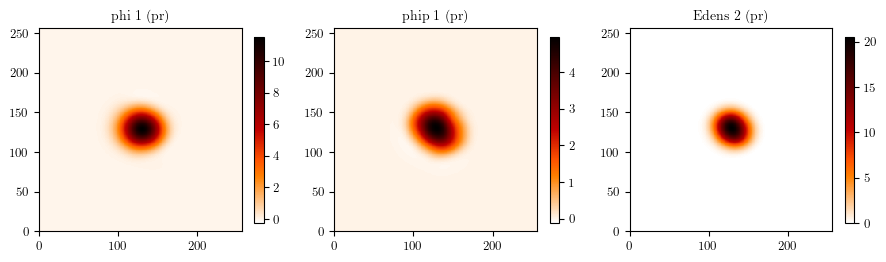

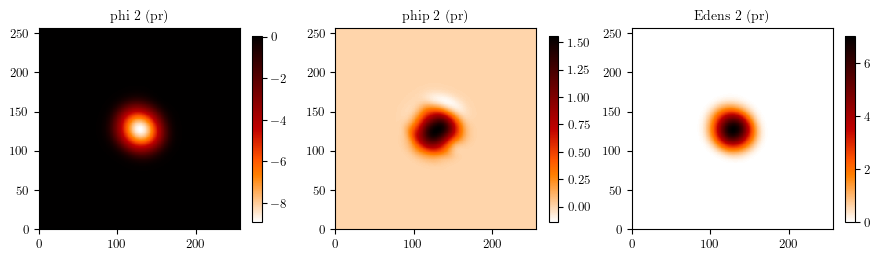

In [12]:
_slice = 128

fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1[:,_slice],
              vmin=phi_1.min(), vmax=phi_1.max(),
              )
axes[0].set_title("phi 1 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[1].pcolormesh(phip_1[:,_slice],
              vmin=phip_1.min(), vmax=phip_1.max(),
              )
axes[1].set_title("phip 1 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[2].pcolormesh(Edens_1[:,_slice],
              vmin=Edens_1.min(), vmax=Edens_1.max(),
              )
axes[2].set_title("Edens 2 (pr)")
fig.colorbar(mesh,shrink=.5)

plt.show()

fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2[:,_slice],
              vmin=phi_2.min(), vmax=phi_2.max(),
              )
axes[0].set_title("phi 2 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[1].pcolormesh(phip_2[:,_slice],
              vmin=phip_2.min(), vmax=phip_2.max(),
              )
axes[1].set_title("phip 2 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[2].pcolormesh(Edens_2[:,_slice],
              vmin=Edens_2.min(), vmax=Edens_2.max(),
              )
axes[2].set_title("Edens 2 (pr)")
fig.colorbar(mesh,shrink=.5)

plt.show()

# Inpterpolate oscillons to same size

In [13]:
data_1.domain_width_pr, data_2.domain_width_pr, data_1.domain_width_pr/data_2.domain_width_pr*128

(array([0.63152, 0.63152, 0.63152]),
 array([0.63152, 0.63152, 0.63152]),
 array([128., 128., 128.]))

In [14]:
L_pr = data_1.domain_width_pr#*shape_ext/data_1.domain_dimensions
L_pr

array([0.63152, 0.63152, 0.63152])

In [15]:
shape_cr = tuple(data_2.domain_dimensions*(data_1.domain_width_pr/data_2.domain_width_pr))
shape_cr = int(shape_cr[0])
shape_cr = (shape_cr, shape_cr, shape_cr)
shape_cr

(256, 256, 256)

In [16]:
def crop_volume(center, shape_cr, *vals):
    
    shape = vals[0].shape
    for val in vals:
        assert val.shape==shape
    
    vals_sh = shift_volume(center, *vals)
    
    slices = tuple([slice(shape_x//2-shape_cr_x//2,shape_x//2+shape_cr_x//2,1) for shape_x,shape_cr_x in zip(shape,shape_cr)])
    vals_sh_cr = tuple(val_sh[slices] for val_sh in vals_sh)
    
    return vals_sh_cr

In [17]:
if shape_cr==data_2.domain_dimensions:
    print("Skip crop")
    phi_2_cr, phip_2_cr = phi_2, phip_2
else:
    phi_2_cr, phip_2_cr = crop_volume(tuple(dim//2 for dim in data_2.domain_dimensions), shape_cr, phi_2, phip_2)

phi_2_cr.shape, phip_2_cr.shape, data_2.domain_width_pr*shape_cr/data_1.domain_dimensions, data_1.domain_width_pr

Skip crop


((256, 256, 256),
 (256, 256, 256),
 array([0.63152, 0.63152, 0.63152]),
 array([0.63152, 0.63152, 0.63152]))

In [18]:
shape_i = (256,256,256)

In [19]:
if shape_i==shape_cr:
    print("Skip interpolate")
    phi_2_i, phip_2_i = phi_2_cr, phip_2_cr
    phi_1_i, phip_1_i = phi_1, phip_1
else:
    phi_2_i, phip_2_i = interpolate(shape_i, phi_2_cr, phip_2_cr)
    phi_1_i, phip_1_i = interpolate(shape_i, phi_1, phip_1)

phi_1_i.shape, phip_1_i.shape, phi_2_i.shape, phip_2_i.shape

Skip interpolate


((256, 256, 256), (256, 256, 256), (256, 256, 256), (256, 256, 256))

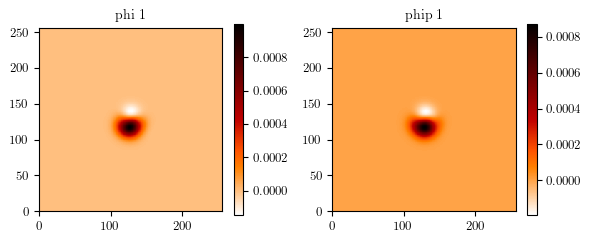

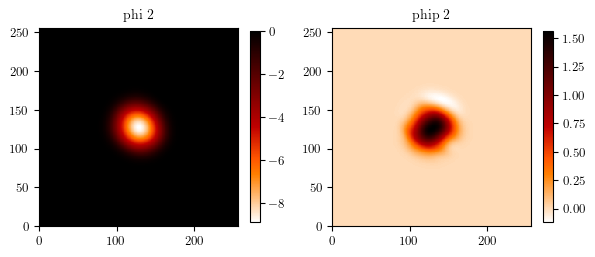

In [20]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_i[:,64])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_i[:,64])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_i[:,128])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_i[:,128])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Add Oscillons to background

In [21]:
pad = 0
shape_bg = tuple(dim_x+pad for dim_x in shape_i)

if pad==0:
    print("Skip background")
    phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg = phi_1_i, phip_1_i, phi_2_i, phip_2_i
    
else:

    phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg = add_field_to_background(np.zeros(shape_bg), phi_1_i, phip_1_i, phi_2_i, phip_2_i)
    phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg = smooth_edge(40, 0.1, 4, phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg)

Skip background


In [22]:
L_bg = L_pr * np.array(shape_bg)/shape_i
L_bg

array([0.63152, 0.63152, 0.63152])

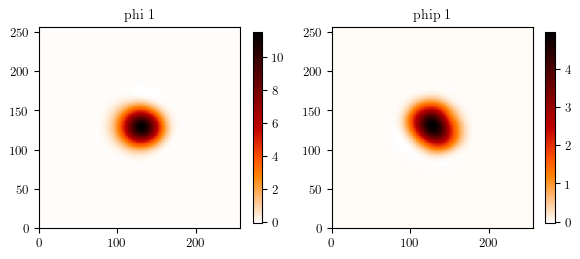

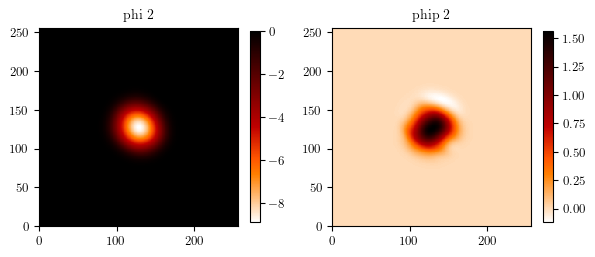

In [23]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_bg[:,shape_bg[0]//2])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_bg[:,shape_bg[0]//2])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_bg[:,shape_bg[0]//2])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_bg[:,shape_bg[0]//2])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Interpolate to final size

In [24]:
shape_ext = (256,256,256)

In [25]:
if shape_ext==phi_1_bg.shape:
    
    print("Skip interpolate")
    phi_1_ext, phip_1_ext, phi_2_ext, phip_2_ext = phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg
    
else:

    phi_1_ext, phip_1_ext, phi_2_ext, phip_2_ext = interpolate(shape_ext, phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg)

Skip interpolate


In [26]:
Edens_1_ext = get_Edens_pr(phi_1_ext,phip_1_ext, a, ap, alpha, beta, phi_0, L_bg/shape_ext)
Edens_2_ext = get_Edens_pr(phi_2_ext,phip_2_ext, a, ap, alpha, beta, phi_0, L_bg/shape_ext)

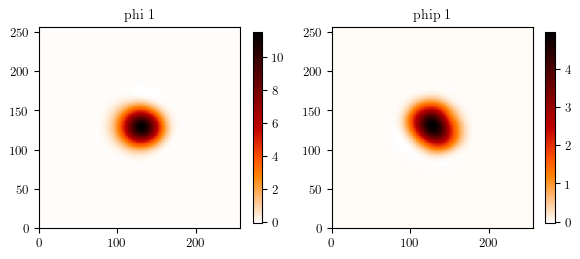

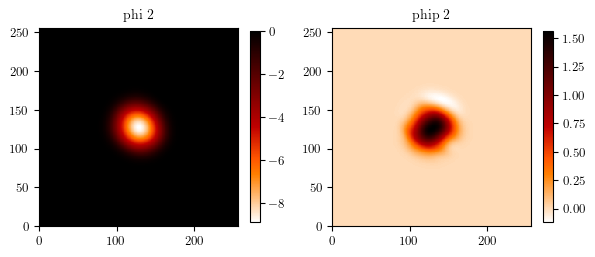

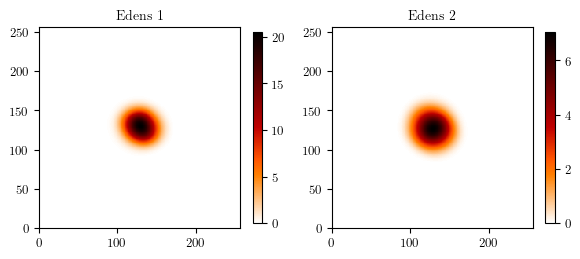

In [27]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_ext[:,shape_ext[0]//2])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_ext[:,shape_ext[0]//2])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_ext[:,shape_ext[0]//2])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_ext[:,shape_ext[0]//2])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(Edens_1_ext[:,shape_ext[0]//2])
axes[0].set_title("Edens 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(Edens_2_ext[:,shape_ext[0]//2])
axes[1].set_title("Edens 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Add boost to oscillons

In [28]:
c_pr = 1/a**(rescale_s+1) # Speed limit in code units
c_pr

0.008671594842282113

In [29]:
def boost_oscillon(boost, phi, phip, domain_width):
    
    assert phi.shape==phip.shape
    shape = phi.shape
    
    grad = gradient_discrete(phi, domain_width/shape, stencil=5)
    
    phip_boost = phip - np.sum([boost_x*grad_x for boost_x,grad_x in zip(boost,grad)],axis=0)
    
    # Print momentum and speed
    Edens_boost = get_Edens_pr(
    phi, phip_boost, a, ap, alpha, beta, phi_0, dxdydz_pr=domain_width/shape
    )
    momenta_pr_boost = get_momenta_pr(phi, phip_boost, a, ap, alpha, beta, phi_0, domain_width/shape)
    field_speed_boost = get_field_speed_pr(momenta_pr_boost, Edens_boost, a, alpha)
    print(f"field speed = {field_speed_boost/c_pr} c_pr")
    print(f"momenta = {momenta_pr_boost.sum(axis=(1,2,3))}")
    
    return phip_boost, field_speed_boost

In [30]:
"""
View momentum before applying boost.
"""

_ = boost_oscillon(np.array([0,0,0]), phi_1_ext, phip_1_ext,L_bg)[0]

field speed = [ 1.99905714e-02 -9.54356847e-06 -2.89013874e-06] c_pr
momenta = [ 1.98835335e+06 -9.49246818e+02 -2.87466372e+02]


In [31]:
boost = np.array([0, 0, 0,]) * c_pr

phip_1_ext_boost = boost_oscillon(np.array([0,0,0]), phi_1_ext, phip_1_ext,L_bg)[0]

Edens_1_boost = get_Edens_pr(
    phi_1_ext, phip_1_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext
    )

field speed = [ 1.99905714e-02 -9.54356847e-06 -2.89013874e-06] c_pr
momenta = [ 1.98835335e+06 -9.49246818e+02 -2.87466372e+02]


In [32]:
"""
View momentum before applying boost.
"""

_ = boost_oscillon(np.array([0,0,0]), phi_2_ext, phip_2_ext, L_bg)

field speed = [1.9965322e-02 9.7176704e-06 8.1135701e-06] c_pr
momenta = [1.02717879e+06 4.99956122e+02 4.17428137e+02]


In [33]:
boost = np.array([0, 0, 0,]) * c_pr

phip_2_ext_boost = boost_oscillon(np.array([0,0,0]), phi_2_ext, phip_2_ext, L_bg)[0]

Edens_2_boost = get_Edens_pr(
    phi_2_ext, phip_2_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext
    )

field speed = [1.9965322e-02 9.7176704e-06 8.1135701e-06] c_pr
momenta = [1.02717879e+06 4.99956122e+02 4.17428137e+02]


# Flip oscillon

In [34]:
phi_1_f = phi_1_ext#.transpose(2,0,1)
phip_1_f = phip_1_ext_boost#.transpose(2,0,1)

In [35]:
phi_2_f = phi_2_ext[::-1,:,:]#.transpose(2,0,1)[::-1,:,:]
phip_2_f = phip_2_ext_boost[::-1,:,:]#.transpose(2,0,1)[::-1,:,:]

# Flip phase of oscillon 2

In [36]:
if 0:
    phi_2_f = -phi_2_f
    phip_2_f = -phip_2_f

# Fit oscillons onto same grid

In [37]:
dx_pr = (L_bg/shape_ext)[0]
dx_pr

0.002466875

In [38]:
mass = get_mass(alpha,beta)
T_pr = 2*np.pi/mass * data_1.rescale_B*a**(data_1.rescale_s)
T_pr

12.395807883178438

In [39]:
D = 0.01*c_pr * T_pr
Dx = (7+0.5)*D
Dx, Dx/dx_pr

(0.008061856777926759, 3.268044298120804)

In [40]:
N = shape_ext[0]
center_1 = (N//2+55,N//2,N//2)
center_2 = (N//2-55,N//2,N//2)

In [41]:
phi_1_sh, phip_1_sh = shift_volume(center_1, phi_1_f, phip_1_f)
phi_2_sh, phip_2_sh = shift_volume(center_2, phi_2_f, phip_2_f)

In [42]:
phi = phi_1_sh + phi_2_sh
phip = phip_1_sh + phip_2_sh

In [43]:
Edens = get_Edens_pr(phi,phip,a,ap,alpha,beta,phi_0,L_bg/shape_ext)

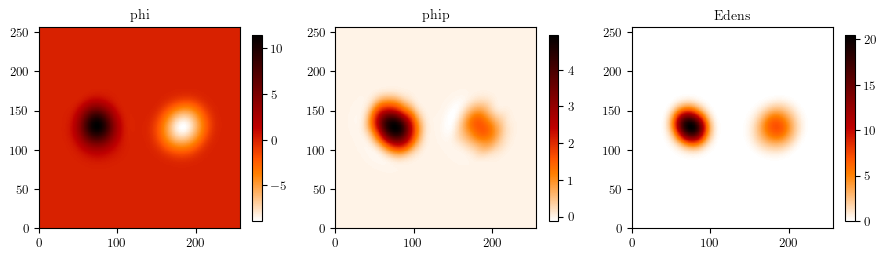

In [44]:
fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

mesh = axes[0].pcolormesh(phi[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
axes[0].set_title("phi")

mesh = axes[1].pcolormesh(phip[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
axes[1].set_title("phip")

mesh = axes[2].pcolormesh(Edens[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
# axes[2].contour(Edens[:,N//2],levels=[1],colors='w')
axes[2].set_title("Edens")

for ax in axes:
    ax.set_aspect('equal')

plt.show()

# Save data

In [45]:
data_1.dt_pr, data_2.dt_pr

(0.001, 0.001)

In [46]:
# dt_pr = 0.0005
dt_pr = data_2.dt_pr

phi_adv = phi + dt_pr/2*phip

In [47]:
L_bg, a, data_1.dt_pr, data_2.dt_pr, dt_pr/(L_bg/shape_ext)

(array([0.63152, 0.63152, 0.63152]),
 10.738670349121094,
 0.001,
 0.001,
 array([0.40537117, 0.40537117, 0.40537117]))

In [48]:
fname_o = "test smash.img"
output_dir = os.path.join(output_dir_1,f"../../smash_{osc_1}_{osc_2}_0.02")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

n_points = np.product(shape_ext)

datname_o = f"test smash.dat"

with open(os.path.join(output_dir, datname_o), 'w') as dat:
#     dat.write(f"{osc1} is on the right and {osc2} is on the left.\n")
    dat.write(f"{osc_1} is on the right and {osc_2} is on the left.\n")
    dat.write(f"N = {shape_ext}\n")
    dat.write(f"L_pr = {L_bg}\n")
    dat.write(f"dt_pr = {dt_pr}\n")
    dat.write(f"alpha = {alpha}\n")
    dat.write(f"beta = {beta}\n")
    dat.write(f"f0 = {phi_0}\n")
    
    dat.write("\n")
    dat.write("Oscillons are given a boost of .02c toward each other\n")
    
    dat.write("\n")
    dat.write(f"output_dir is {output_dir}")

with open(os.path.join(output_dir,fname_o),'wb') as f_o:
    
    f_o.write(struct.pack('<i',-1))
    f_o.write(struct.pack('<f',0))
    f_o.write(struct.pack('<f',a))
    f_o.write(struct.pack('<f',0))
    
    f_o.write(struct.pack('<'+'f'*n_points,*phi_adv.flatten()))
    f_o.write(struct.pack('<'+'f'*n_points,*phip.flatten()))